# Customer Purchase Behavior and Sentiment Analysis

**Objective:**
Build an advanced end-to-end customer purchase behavior and sentiment analysis system using SQL, Python, and PowerBI. This project will help you understand not only the purchase patterns and key performance indicators but also the customer sentiments related to their purchases. This will generate comprehensive insights for business decision-making.

**Problem Statement:**
You are provided with two datasets: one containing customer purchase information and another containing customer reviews for the purchased products. The datasets include the following details:

**Customer Purchase Data:**

- Transaction ID
- Customer ID
- Customer Name
- Product ID
- Product Name
- Product Category
- Purchase Quantity
- Purchase Price
- Purchase Date
- Country

**Customer Reviews Data:**

- Review ID
- Customer ID
- Product ID
- Review Text
- Review Date

**Your task is to create a comprehensive customer purchase behavior and sentiment analysis system by following the steps outlined below:**

In [14]:
# import neccessary libraries
import pymysql
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


### Data Extraction: Write a Python script to extract data from the SQL database.

In [45]:
# Establishing a connection to the MySQL database using pymsql library
db = pymysql.connect(
    host = 'localhost',
    user = 'root',
    password = 'Rafi@mysql123',
    database = 'Customer_Purchase_DB'

)

cur = db.cursor()
cur

In [16]:
cur.execute('SHOW DATABASES')

for database in cur:
    print(database)

('commerce',)
('companyhr',)
('crashcourse',)
('customer_purchase_db',)
('ecommerce',)
('hr_employee_db',)
('information_schema',)
('kaggle_ecommerce',)
('mysql',)
('performance_schema',)
('sys',)


In [17]:
cur.execute('SHOW TABLES')

for table in cur:
    print(table)

('customers',)
('product',)
('purchasedata',)
('reviewdata',)
('transactions',)


In [18]:
# Extracted customers table from the MySQL Database
query = ''' SELECT *
            FROM customers'''

cur.execute(query)

data = cur.fetchall()
customers_df = pd.DataFrame(data, columns = ['CustomerID', 'CustomerName', 'Country'])
customers_df.head()

,CustomerID,CustomerName,Country
0,100,Victoria Larson,Tuvalu
1,102,Ronald Brandt,Maldives
2,104,Richard Joseph,Falkland Islands (Malvinas)
3,105,Andrew Esparza,Macedonia
4,107,Christine Soto,Poland


In [19]:
# Extracted products table from the MySQL Database
query = ''' SELECT *
            FROM Product'''

cur.execute(query)

data = cur.fetchall()
products_df = pd.DataFrame(data, columns = ['ProductID', 'ProductName', 'ProductCategory'])
products_df.head()

,ProductID,ProductName,ProductCategory
0,200,Printer,Electronics
1,201,Coffee Maker,Home Appliances
2,202,Printer,Electronics
3,203,Television,Electronics
4,204,Smart Bulb,Electronics


In [20]:
# Extracted transactions table from the MySQL Database
query = ''' SELECT *
            FROM Transactions'''

cur.execute(query)

data = cur.fetchall()
transactions_df = pd.DataFrame(data, columns = ['TransactionID', 'CustomerID', 'ProductID', 
                                            'PurchaseQuantity', 'PurchasePrice', 'PurchaseDate']
                          )
transactions_df.head()

,TransactionID,CustomerID,ProductID,PurchaseQuantity,PurchasePrice,PurchaseDate
0,1,887,240,5,689.99,2024-03-01
1,2,560,299,4,79.27,2024-01-26
2,3,701,207,3,666.75,2024-05-13
3,4,630,290,5,316.19,2023-09-21
4,5,631,281,4,700.24,2024-01-25


In [46]:
# Extracted reviews table from the MySQL Database
query = ''' SELECT *
            FROM ReviewData'''

cur.execute(query)

data = cur.fetchall()
review_df = pd.DataFrame(data, columns = ['ReviewID', 'CustomerID', 'ProductID', 'ReviewText', 'ReviewDate'])
review_df.head()

,ReviewID,CustomerID,ProductID,ReviewText,ReviewDate
0,1,486,267,So impressed by the quality. This product trul...,2024-05-12
1,2,810,246,I'm very happy with the performance. It does e...,2024-03-07
2,3,855,291,I regret buying this. The quality is terrible ...,2023-11-15
3,4,524,235,"It serves its purpose, but it's not anything e...",2024-05-27
4,5,238,220,Very high-quality product. I would buy it agai...,2023-09-10


In [21]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   TransactionID     1000 non-null   int64 
 1   CustomerID        1000 non-null   int64 
 2   ProductID         1000 non-null   int64 
 3   PurchaseQuantity  1000 non-null   int64 
 4   PurchasePrice     1000 non-null   object
 5   PurchaseDate      1000 non-null   object
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


In [22]:
transactions_df['PurchasePrice'] = transactions_df['PurchasePrice'].astype('float')
transactions_df['PurchaseDate'] = pd.to_datetime(transactions_df['PurchaseDate'])

### Data Analysis: Perform the following analysis using Python:
### Calculate total purchases, total revenue, and average purchase value.

In [23]:

print(f'Total purchases ${transactions_df['PurchasePrice'].sum()}')

print(f'Averaga purchase value per transaction: ${round(transactions_df['PurchasePrice'].mean(), 2)}')

avg_cust = transactions_df['PurchasePrice'].sum()/transactions_df['CustomerID'].nunique()
print(f'Averaga purchase value per customers: ${round(avg_cust, 2)}')


Total purchases $489274.72
Averaga purchase value per transaction: $489.27
Averaga purchase value per customers: $803.41


### Identify top customers and their purchasing behavior.

In [24]:

cust_trans = pd.merge(transactions_df, customers_df, on='CustomerID', how='inner')

print('Top 5 Customers by total puchased price:')
cust_trans.groupby(by = 
                    ['CustomerID', 'CustomerName']
                  )['PurchasePrice'].sum().reset_index().sort_values(by='PurchasePrice', ascending=False).iloc[:5,:]

Top 5 Customers by total puchased price:


,CustomerID,CustomerName,PurchasePrice
237,467,Ashley Parrish,4315.46
280,529,Taylor Small,3173.35
148,328,Nicole Good,3094.51
5,108,Eddie Mueller,2871.47
469,788,Miranda Foster,2814.04


In [25]:
print('Top 5 Customers by number of transactions:')
cust_trans.groupby(by = 
                    ['CustomerID', 'CustomerName']
                  )['TransactionID'].count().reset_index().sort_values(by='TransactionID', ascending=False).iloc[:5,:]

Top 5 Customers by number of transactions:


,CustomerID,CustomerName,TransactionID
468,787,Joseph Horton,5
75,216,Joshua Ritter,5
477,801,Jesse Barker,5
5,108,Eddie Mueller,5
237,467,Ashley Parrish,5


### Analyze purchase trends over time (monthly, quarterly, yearly).

In [26]:

transactions_df['PurchaseMonth'] = transactions_df['PurchaseDate'].dt.month_name()
transactions_df['PurchaseMonthNum'] = transactions_df['PurchaseDate'].dt.month

print('Monthly total Revenue generated:')
df = transactions_df.groupby(by=
                        ['PurchaseMonthNum',
                        "PurchaseMonth"])['PurchasePrice'].sum().reset_index()
df = df.sort_values(by='PurchaseMonthNum').iloc[:,1:]
df

Monthly total Revenue generated:


,PurchaseMonth,PurchasePrice
0,January,43575.14
1,February,41393.77
2,March,37442.66
3,April,34165.64
4,May,42799.97
5,June,31563.91
6,July,47956.69
7,August,33493.46
8,September,46764.80
9,October,38368.97


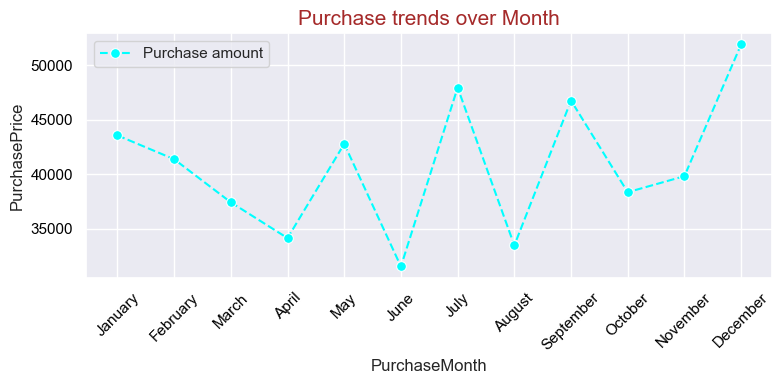

In [27]:

plt.figure(figsize=(8, 4))
sns.lineplot(x = df.PurchaseMonth, y = df['PurchasePrice'], 
             marker='o', color = 'cyan', markersize = 7,
             linestyle='--', label='Purchase amount')

plt.title('Purchase trends over Month', color = 'brown', fontsize = 15)
plt.yticks(color ='black')
plt.xticks(rotation=45, color = 'black')
plt.tight_layout()
plt.show()


In [28]:

transactions_df['PurchaseQuarter'] = transactions_df['PurchaseDate'].dt.quarter

print('Quarterly total Revenue generated:')

transactions_df.groupby(by=['PurchaseQuarter'])['PurchasePrice'].sum().reset_index()


Quarterly total Revenue generated:


,PurchaseQuarter,PurchasePrice
0,1,122411.57
1,2,108529.52
2,3,128214.95
3,4,130118.68


In [29]:

print('Yearly total Revenue generated:')
transactions_df.groupby(by=transactions_df['PurchaseDate'].dt.year)['PurchasePrice'].sum().reset_index()


Yearly total Revenue generated:


,PurchaseDate,PurchasePrice
0,2023,262346.07
1,2024,226928.65


In [30]:
print('Weekly total Revenue generated:')
df = transactions_df.groupby(by=transactions_df['PurchaseDate'].dt.day_name())['PurchasePrice'].sum().reset_index()
df = df.sort_values(by='PurchasePrice', ascending=False)
df

Weekly total Revenue generated:


,PurchaseDate,PurchasePrice
0,Friday,80450.53
5,Tuesday,75200.05
6,Wednesday,71266.62
1,Monday,70973.43
4,Thursday,65950.16
2,Saturday,62981.60
3,Sunday,62452.33


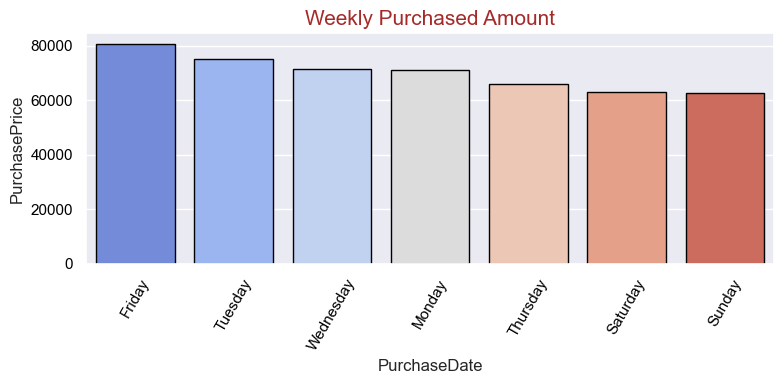

In [31]:
plt.figure(figsize=(8, 4))
sns.barplot(x = df['PurchaseDate'], y = df['PurchasePrice'], data = df, palette = 'coolwarm', edgecolor = 'black')

plt.title('Weekly Purchased Amount', color = 'brown', fontsize = 15)
plt.yticks(color ='black')
plt.xticks(rotation=60, color = 'black')
plt.tight_layout()
plt.show()

### Identify the top-performing product categories.

In [32]:

prod_trans = pd.merge(products_df, transactions_df, on='ProductID', how='inner')

df = prod_trans.groupby(by=['ProductCategory'])['PurchasePrice'].sum().reset_index()
print(f'Top-performing Product category by total purchased:')
df.sort_values(by='PurchasePrice', ascending=False).iloc[:1,:]


Top-performing Product category by total purchased:


,ProductCategory,PurchasePrice
0,Electronics,245354.82


In [33]:

df = prod_trans.groupby(by=['ProductCategory'])['TransactionID'].count().reset_index()
print(f'Top-performing Product category by Purchased count:')
df.sort_values(by='TransactionID', ascending=False).iloc[:1,:]


Top-performing Product category by Purchased count:


,ProductCategory,TransactionID
0,Electronics,503


###  Identify the top-performing product.

In [34]:
df1 = prod_trans.groupby(by=['ProductName'])['PurchasePrice'].sum().reset_index()
print(f'Top-performing Product by Total Purchased:')
df1 = df1.sort_values(by='PurchasePrice', ascending=False).iloc[:5,:]
df1


Top-performing Product by Total Purchased:


,ProductName,PurchasePrice
4,Electric Kettle,39992.67
5,Headphones,39458.71
16,Television,39092.90
19,Washing Machine,34375.71
9,Printer,31652.45


In [35]:

df2 = prod_trans.groupby(by=['ProductName'])['TransactionID'].count().reset_index()
print(f'Top-performing Product by Purchased count:')
df2= df2.sort_values(by='TransactionID', ascending=False).iloc[:5,:]
df2


Top-performing Product by Purchased count:


,ProductName,TransactionID
16,Television,80
5,Headphones,76
4,Electric Kettle,76
19,Washing Machine,69
9,Printer,62


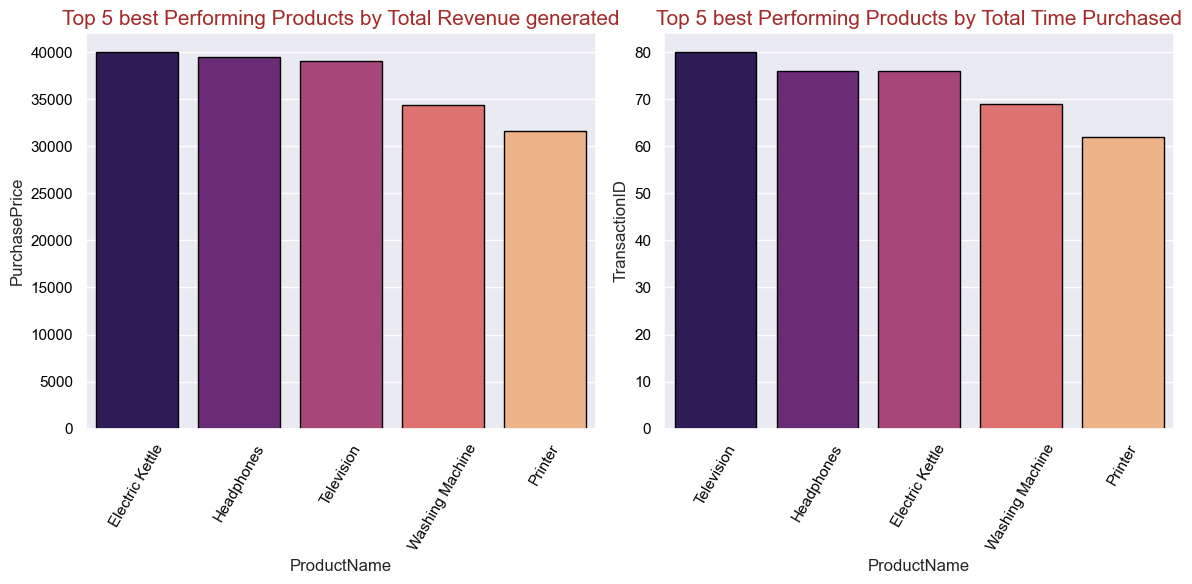

In [36]:

plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
sns.barplot(x = df1.ProductName, y = df1['PurchasePrice'], data = df1, palette = 'magma', edgecolor = 'black')
plt.title('Top 5 best Performing Products by Total Revenue generated', color = 'brown', fontsize = 15)
plt.yticks(color ='black')
plt.xticks(rotation=60, color = 'black')

plt.subplot(1,2,2)
sns.barplot(x = df2.ProductName, y = df2['TransactionID'], data = df2, palette = 'magma', edgecolor = 'black')
plt.title('Top 5 best Performing Products by Total Time Purchased', color = 'brown', fontsize = 15)
plt.yticks(color ='black')
plt.xticks(rotation=60, color = 'black')

plt.tight_layout()
plt.show()


In [152]:
# !pip install textblob

### Performed sentiment analysis on the review texts.

In [48]:

from textblob import TextBlob

sentiments = [TextBlob(review).sentiment.polarity for review in review_df['ReviewText']]

review_df['ReviewSentiment'] = sentiments
review_df.loc[:, ['ReviewText', 'ReviewSentiment']].sample(5)


,ReviewText,ReviewSentiment
715,"The product works as expected, but it's nothin...",0.128571
686,"It's not a bad product, but I think I could fi...",0.425000
798,"It works, but I've had better products for the...",0.250000
429,It stopped working almost immediately. Waste o...,-0.200000
598,"I don't hate it, but I don't love it either. I...",-0.150000


### Classify reviews into positive, negative, or neutral sentiments.

In [54]:

def Review_classifier(sentiment_score):
    if sentiment_score > 0.05:
        return 'Positive'
    elif sentiment_score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

review_df['SentimentClass'] = review_df['ReviewSentiment'].apply(Review_classifier)


### Analyze customer sentiments related to different products and categories.

In [49]:

review_prod = pd.merge(review_df, products_df, on='ProductID', how='inner')

df = review_prod.groupby(by='ProductName')['ReviewSentiment'].mean().reset_index()

print(f'Top 5 products with highest average positive reviews sentiment:,')
df.sort_values(by='ReviewSentiment', ascending=False).iloc[:5, :]


Top 5 products with highest average positive reviews sentiment:,


,ProductName,ReviewSentiment
18,Vacuum Cleaner,0.491285
11,Router,0.409288
7,Laptop,0.409125
6,Heater,0.395901
17,Toaster,0.358584


In [50]:

df = review_prod.groupby(by='ProductName')['ReviewSentiment'].mean().reset_index()

print(f'Bottom 5 products with lowest average negative reviews sentiments:,')
df.sort_values(by='ReviewSentiment', ascending=True).iloc[:5, :]


Bottom 5 products with lowest average negative reviews sentiments:,


,ProductName,ReviewSentiment
8,Microwave,0.121546
2,Camera,0.204063
12,Smart Bulb,0.215697
1,Blender,0.232237
15,Tablet,0.254882


In [51]:

df = review_prod.groupby(by='ProductCategory')['ReviewSentiment'].mean().reset_index()

print(f'Top Product category by positive average reviews sentiments:,')
df.sort_values(by='ReviewSentiment', ascending=False).iloc[:1, :]


Top Product category by positive average reviews sentiments:,


,ProductCategory,ReviewSentiment
0,Electronics,0.313219


In [52]:

df = review_prod.groupby(by='ProductName')['ReviewID'].count().reset_index()

print(f'5 Most Reviewed Products:')
df = df.sort_values(by='ReviewID', ascending=False).iloc[:5, :]
df.rename(columns={'ReviewID':'Number_of_reviews'}, inplace = True)
df


5 Most Reviewed Products:


,ProductName,Number_of_reviews
4,Electric Kettle,85
16,Television,80
19,Washing Machine,76
9,Printer,76
5,Headphones,73


In [56]:
review_df.to_csv('updated_review_data.csv', index = False)
